#### Contact Info>
    Minji Lee
    email: lee.minji9521@gmail.com
    cell: 857-316-7741

#### Goal>>

    Transform the hourly wind speed using the power curve to get hourly energy production
    Aggregate hourly energy production to the monthly level
    Compare modeled monthly energy to the publicly reported observed energy

In [34]:
import numpy as np
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from scipy.interpolate import UnivariateSpline

In [36]:
%matplotlib inline

In [256]:
windData = pd.read_csv("WindData.csv")
siteData = pd.read_csv("SiteData.csv")
powerCurve = pd.read_csv("PowerCurve.csv")
siteEnergy = pd.read_csv("SiteEnergy.csv")

#### Class and functions

In [257]:
class Data:

    def __init__(self,filepath):
        self.n = 0
        self.csv = pd.read_csv(filepath)
        
    def __iter__(self):
        self.n = 0
        return self
    
    def __next__(self):
        
        if self.n < len(self.csv)-1:
            self.n= self.n+1
            return self.csv.iloc[self.n]
        else:
            raise StopIteration
        
    def __str__(self):
        return str("This is a dataframe object\n\n" + str(self.csv.head()))
    
    def plot(self, x, y): ## Run polynomialRegression first then run plot
        
        self.csv.plot(x=x, y=y)
        
#         try:
        
        pred_plot = plt.plot(self.csv[x].values
                    ,np.array([self.csv[y].values,data.y_hat]).T)

        
#         except Exception:
#         print("Run polynomial Regression first!")
    
    
    def trainTestSplit(self, x, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.csv[x], self.csv[y],
                                                            test_size=0.33, random_state=12)
        
    def polynomialRegression(self):
        
        self.poly = PolynomialFeatures(degree=15)
        
        X_train = np.array(self.X_train)
        X_train = X_train.reshape(-1,1)
        self.X_poly_train = self.poly.fit_transform(X_train)
        
        X_test = np.array(self.X_test)
        X_test = X_test.reshape(-1,1)
        self.X_poly_test = self.poly.fit_transform(X_test)
        
        
        self.lm = LinearRegression()
        self.lm = Ridge(alpha=1.5)
        self.lm.fit(self.X_poly_train, self.y_train)
        self.y_hat = self.lm.predict(self.X_poly_test)
        
        self.rSquared = r2_score(np.array(self.y_test).reshape(-1,1), self.y_hat)

        p_predictedEnergy = poly.fit_transform(np.array(data4poly_wind.csv['Wind_Speed']).reshape(-1,1))
        
    def univariateSpline(self, x, y):
        
        s = univariateSpline(self.csv['WindSpeed.ms'].values, data.csv['Power.kW'].values, s=0)
        
        y_hat = s(data.X_test.values)


In [325]:
# powerCurve
data = Data(filepath ="C:/Users/minji/Documents/R/Resurety/REsurety Engineer Assessment [9023]/REsurety Engineer Assessment/PowerCurve.csv")

data4poly_wind = Data(filepath ="C:/Users/minji/Documents/R/Resurety/REsurety Engineer Assessment [9023]/REsurety Engineer Assessment/windData.csv")

#### PowerCurve in graph

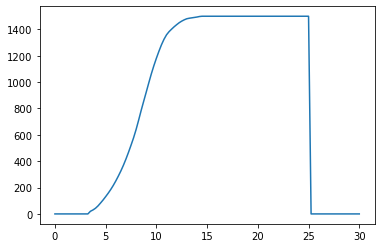

In [260]:
plt.plot(powerCurve['WindSpeed.ms'],powerCurve['Power.kW'])

#### ML models - Polynomial Regression

In [307]:
data.trainTestSplit('WindSpeed.ms','Power.kW')
data.polynomialRegression()
print(data.rSquared)

0.8979215815360578


c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99917e-45): result may not be accurate.
  overwrite_a=True).T


In [327]:
data4poly_wind.csv

,Time,Wind_Speed
0,1979-01-01 00:00:00 UTC,5.554685
1,1979-01-01 01:00:00 UTC,6.209669
2,1979-01-01 02:00:00 UTC,6.908693
3,1979-01-01 03:00:00 UTC,7.457435
4,1979-01-01 04:00:00 UTC,7.501590
...,...,...
322867,2015-10-31 19:00:00 UTC,7.873740
322868,2015-10-31 20:00:00 UTC,7.084636
322869,2015-10-31 21:00:00 UTC,6.851083
322870,2015-10-31 22:00:00 UTC,6.686824


In [328]:
# data4poly_wind.trainTestSplit('WindSpeed.ms','Power.kW')
data4poly_wind.polynomialRegression()
print(data4poly_wind.rSquared)

AttributeError: 'Data' object has no attribute 'X_train'

In [334]:
poly = PolynomialFeatures(degree=15)

In [340]:
p_predictedEnergy = poly.fit_transform(np.array(data4poly_wind.csv['Wind_Speed']).reshape(-1,1))

In [345]:
pd.DataFrame(p_predictedEnergy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,5.554685,30.854531,171.387214,952.002070,5288.072079,29373.577197,1.631610e+05,9.063079e+05,5.034256e+06,2.796371e+07,1.553296e+08,8.628070e+08,4.792622e+09,2.662151e+10,1.478741e+11
1,1.0,6.209669,38.559984,239.444724,1486.872390,9232.984814,57333.776020,3.560237e+05,2.210790e+06,1.372827e+07,8.524801e+07,5.293619e+08,3.287162e+09,2.041219e+10,1.267529e+11,7.870936e+11
2,1.0,6.908693,47.730035,329.752143,2278.156226,15739.081287,108736.476008,7.512269e+05,5.189996e+06,3.585609e+07,2.477187e+08,1.711412e+09,1.182362e+10,8.168577e+10,5.643419e+11,3.898864e+12
3,1.0,7.457435,55.613335,414.732829,3092.843082,23064.675975,172003.319850,1.282704e+06,9.565678e+06,7.133542e+07,5.319793e+08,3.967201e+09,2.958514e+10,2.206293e+11,1.645328e+12,1.226993e+13
4,1.0,7.501590,56.273852,422.143360,3166.746387,23755.632860,178205.016620,1.336821e+06,1.002828e+07,7.522806e+07,5.643301e+08,4.233373e+09,3.175703e+10,2.382282e+11,1.787090e+12,1.340602e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322867,1.0,7.873740,61.995782,488.138667,3843.476948,30262.538214,238279.357849,1.876150e+06,1.477232e+07,1.163134e+08,9.158212e+08,7.210938e+09,5.677705e+10,4.470477e+11,3.519938e+12,2.771507e+13
322868,1.0,7.084636,50.192068,355.592533,2519.243673,17847.924525,126446.049344,8.958242e+05,6.346589e+06,4.496327e+07,3.185484e+08,2.256800e+09,1.598860e+10,1.132734e+11,8.025011e+11,5.685428e+12
322869,1.0,6.851083,46.937332,321.571532,2203.113099,15093.709629,103408.250111,7.084585e+05,4.853707e+06,3.325315e+07,2.278201e+08,1.560814e+09,1.069327e+10,7.326045e+10,5.019134e+11,3.438650e+12
322870,1.0,6.686824,44.713616,298.992080,1999.307428,13369.016964,89396.263976,5.977771e+05,3.997230e+06,2.672877e+07,1.787306e+08,1.195140e+09,7.991692e+09,5.343904e+10,3.573374e+11,2.389453e+12


In [351]:
lm.coef_

array([ 0.00000000e+00, -6.61562776e+01, -1.50529842e+01,  1.40714415e+02,
       -8.77832951e+01,  2.38779817e+01, -3.51129063e+00,  2.94918382e-01,
       -1.29583486e-02,  9.48797278e-05,  2.01718148e-05, -1.07653996e-06,
        2.34599286e-08, -1.54145951e-10, -2.25741954e-12,  3.20907460e-14])

In [343]:
p_predictedEnergy = lm.predict(p_predictedEnergy)

array([ 93.35269131, 185.05855409, 350.76011213, ..., 334.9015148 ,
       291.63374831, 174.16152597])

Polynomial Regression shows quite high accuracy

In [308]:
evaluation_plot = pd.DataFrame()

evaluation_plot['x_test'] = data.X_test.values
evaluation_plot['y_hat'] = data.y_hat
evaluation_plot['y_test'] = data.y_test.values


In [309]:
evaluation_plot

,x_test,y_hat,y_test
0,7.75,610.036819,577
1,16.00,1576.648668,1500
2,6.50,246.293993,326
3,25.00,919.158017,1500
4,21.25,1510.457453,1500
5,27.25,-149.979303,0
6,10.00,1220.112176,1181
7,0.25,-35.288724,0
8,17.25,1554.181215,1500
9,2.75,136.964084,0


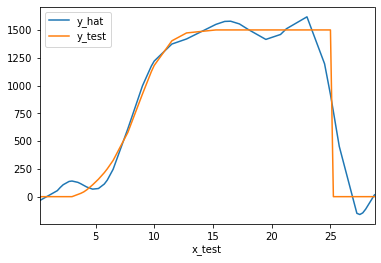

In [310]:
evaluation_plot.sort_values('x_test').set_index('x_test').plot()

Let's run this model over windData

In [323]:
p_predictedEnergy = lm.predict(np.array(windData['Wind_Speed']).reshape(-1,1))

ValueError: shapes (322872,1) and (16,) not aligned: 1 (dim 1) != 16 (dim 0)

#### ML models - Univariate Spline

In [265]:
s = UnivariateSpline(data.csv['WindSpeed.ms'].values, data.csv['Power.kW'].values, s=0)
y_hat = s(data.X_test.values)

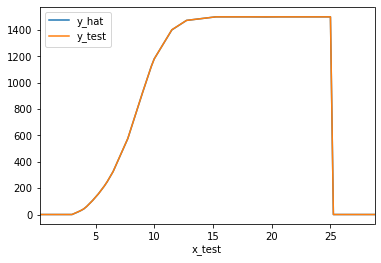

In [266]:
evaluation_plot = pd.DataFrame()

evaluation_plot['x_test'] = data.X_test.values
evaluation_plot['y_hat'] = [int(i) for i in y_hat]
evaluation_plot['y_test'] = data.y_test.values

evaluation_plot.sort_values('x_test').set_index('x_test').plot()


plot seems something wrong so I got the rsquared

In [267]:
r2_score(np.array(data.y_test).reshape(-1,1), y_hat)

1.0

In [283]:
windData['s_powerPrediction'] = s(windData['Wind_Speed'])

In [273]:
# Take long
windData['byMonth'] = pd.to_datetime(windData['Time']).apply(lambda x: str(x.year) + '-' + str(x.month))

In [311]:
windData

,Time,Wind_Speed,s_powerPrediction,byMonth
0,1979-01-01 00:00:00 UTC,5.554685,191.518359,1979-1
1,1979-01-01 01:00:00 UTC,6.209669,280.900125,1979-1
2,1979-01-01 02:00:00 UTC,6.908693,398.371220,1979-1
3,1979-01-01 03:00:00 UTC,7.457435,511.707973,1979-1
4,1979-01-01 04:00:00 UTC,7.501590,521.347237,1979-1
...,...,...,...,...
322867,2015-10-31 19:00:00 UTC,7.873740,607.108748,2015-10
322868,2015-10-31 20:00:00 UTC,7.084636,432.833548,2015-10
322869,2015-10-31 21:00:00 UTC,6.851083,387.526872,2015-10
322870,2015-10-31 22:00:00 UTC,6.686824,357.737294,2015-10


In [239]:
s_monthlyEnergy = windData[['s_powerPrediction','byMonth']].groupby('byMonth').sum()

In [240]:
s_monthlyEnergy

,s_powerPrediction
byMonth,
1979-1,380813.624093
1979-10,384100.633737
1979-11,382001.776281
1979-12,422983.276609
1979-2,348542.151476
...,...
2015-5,319493.534756
2015-6,171450.620998
2015-7,189787.107412


In [321]:
lm.predict(np.array(windData['Wind_Speed']).reshape(-1,1))

ValueError: shapes (322872,1) and (16,) not aligned: 1 (dim 1) != 16 (dim 0)

In [312]:
comparison = pd.merge(s_monthlyEnergy,siteEnergy, how='inner', left_index=True, right_on='Month')

In [313]:
comparison

,s_powerPrediction,Month,Energy.MWh
9,375139.585375,2007-10,49717.289
10,315977.856737,2007-11,41376.384
11,395477.802642,2007-12,41192.326
21,347844.981754,2008-10,53816.000
22,450028.552733,2008-11,70383.000
23,485389.126407,2008-12,64661.000
33,430053.900184,2009-10,52774.000
34,302248.107777,2009-11,50849.000
35,386841.561904,2009-12,57597.000
45,345011.270152,2010-10,48288.000


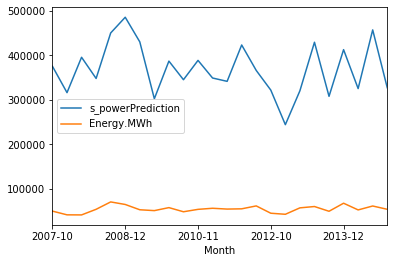

In [314]:
comparison.set_index('Month').plot()

#### Compare power energy I got from polynomial regression to the sitedata

In [353]:
X_poly = data.poly.fit_transform(np.array(windData['Wind_Speed']).reshape(-1,1))
windData['powerPrediction']= data.lm.predict(X_poly)

AttributeError: 'Data' object has no attribute 'poly'

In [172]:
windData['byMonth'] = pd.to_datetime(windData['Time']).apply(lambda x: str(x.year) + '-' + str(x.month))

KeyboardInterrupt: 

In [315]:
windData

,Time,Wind_Speed,s_powerPrediction,byMonth
0,1979-01-01 00:00:00 UTC,5.554685,191.518359,1979-1
1,1979-01-01 01:00:00 UTC,6.209669,280.900125,1979-1
2,1979-01-01 02:00:00 UTC,6.908693,398.371220,1979-1
3,1979-01-01 03:00:00 UTC,7.457435,511.707973,1979-1
4,1979-01-01 04:00:00 UTC,7.501590,521.347237,1979-1
...,...,...,...,...
322867,2015-10-31 19:00:00 UTC,7.873740,607.108748,2015-10
322868,2015-10-31 20:00:00 UTC,7.084636,432.833548,2015-10
322869,2015-10-31 21:00:00 UTC,6.851083,387.526872,2015-10
322870,2015-10-31 22:00:00 UTC,6.686824,357.737294,2015-10


In [174]:
p_monthlyEnergy = windData[['byMonth','p_powerPrediction']].groupby('byMonth').sum()

In [252]:
final = pd.merge(temp, siteEnergy, left_index = True, right_on = 'Month')
final.set_index('Month')

,s_powerPrediction,p_powerPrediction,Energy.MWh
Month,,,
2007-10,375139.585375,385564.670025,49717.289
2007-11,315977.856737,328266.719074,41376.384
2007-12,395477.802642,395057.054647,41192.326
2008-10,347844.981754,355193.033292,53816.000
2008-11,450028.552733,453489.250815,70383.000
2008-12,485389.126407,487876.123233,64661.000
2009-10,430053.900184,427920.312490,52774.000
2009-11,302248.107777,300653.128189,50849.000
2009-12,386841.561904,382026.729763,57597.000


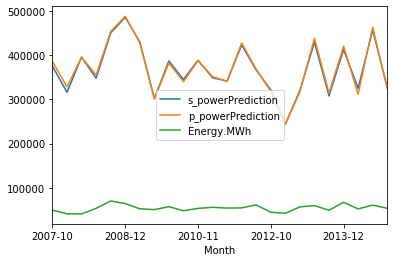

In [254]:
final.plot(x='Month')

In [176]:
comparison = pd.merge(p_monthlyEnergy,siteEnergy, how='inner', left_index=True, right_on='Month')

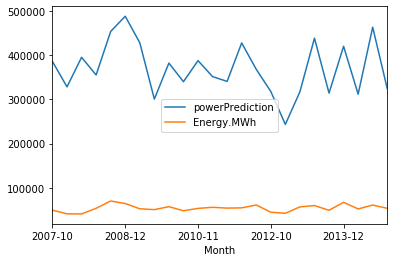

In [177]:
comparison.set_index('Month').plot()

In [317]:
total_monthlyEnergy = pd.DataFrame()
total_monthlyEnergy['splinePrediction']=np.array(s_monthlyEnergy['powerPrediction'])
total_monthlyEnergy['polynomialPrediction']=np.array(p_monthlyEnergy['powerPrediction'])



KeyError: 'powerPrediction'

In [220]:
total_monthlyEnergy

,splinePrediction,polynomialPrediction
0,380813.624093,391053.879382
1,384100.633737,387331.409584
2,382001.776281,384245.971562
3,422983.276609,426631.605384
4,348542.151476,349676.524753
...,...,...
437,319493.534756,323461.858193
438,171450.620998,183210.298526
439,189787.107412,200241.404610
440,249932.904146,248626.198066
